In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
codes = pd.read_csv("MA_BuildingUseCodes_BldgType.csv", header=3, encoding='latin-1')
properties = pd.read_csv("property-assessment-fy2017.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bldg_type = dict(zip(codes.Code, codes.Building_Category.values))

In [4]:
buildings = properties[['PTYPE', 'YR_BUILT']]

In [5]:
buildings['BUILDING_TYPE'] = buildings['PTYPE'].map(bldg_type)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
buildings = buildings[pd.notnull(buildings['BUILDING_TYPE'])] #the NaN values are individual condos and anything that isn't mapped to a building type. Could be land parcels, etc. 
len(buildings.index) 

95979

In [7]:
len(properties.index) #significantly larger than buildings. to check later - how many CD are dropped? how many land types are dropped? 

170910

In [8]:
#In row 10, there are CD labels for a few rows but not associated CM. How many of these are there? How should they be handled? For now, they're just dropped. Definitely not the best way to handle
#Will come back to different ways of handling

In [9]:
buildings['YR_BUILT'].value_counts() #7,936 0.0 values to drop

1900.0    10909
0.0        7936
1920.0     7737
1910.0     7317
1905.0     7257
1890.0     5000
1899.0     4905
1999.0     3712
1950.0     2909
1925.0     2764
1930.0     2760
1935.0     1895
1960.0     1640
1915.0     1631
1880.0     1589
1940.0     1532
1885.0      956
1955.0      881
1875.0      668
1945.0      666
1895.0      554
1965.0      551
1928.0      539
1860.0      438
1870.0      425
1970.0      408
2004.0      405
2000.0      356
2006.0      349
1929.0      349
          ...  
1847.0        3
1811.0        2
1833.0        2
1785.0        2
1821.0        2
1822.0        2
1809.0        2
1841.0        2
1725.0        2
1780.0        2
1799.0        2
1752.0        2
1798.0        2
1832.0        2
1807.0        1
1803.0        1
1804.0        1
1806.0        1
1802.0        1
1816.0        1
1808.0        1
1700.0        1
1814.0        1
1819.0        1
1760.0        1
1823.0        1
1710.0        1
1775.0        1
1779.0        1
1792.0        1
Name: YR_BUILT, Length: 

In [10]:
buildings = buildings[buildings.YR_BUILT != 0] #remove data entry errors

In [11]:
len(buildings.index) #88,043

88043

In [12]:
#match year, building type with count for further processing
buildings = buildings.groupby(["YR_BUILT", "BUILDING_TYPE"]).size().reset_index(name="Count")

In [13]:
#226 years total
years = buildings.YR_BUILT.unique()

In [14]:
#Creating 226 counts to match years
smallFam = [buildings.loc[(buildings['YR_BUILT']==year)&(buildings['BUILDING_TYPE']=='1to6 Family'),'Count'].iloc[0] if (buildings[(buildings['YR_BUILT']==year) & (buildings['BUILDING_TYPE']=='1to6 Family')].empty == False) else 0 for year in years]
multiFam = [buildings.loc[(buildings['YR_BUILT']==year)&(buildings['BUILDING_TYPE']=='Multifamily'),'Count'].iloc[0] if (buildings[(buildings['YR_BUILT']==year) & (buildings['BUILDING_TYPE']=='Multifamily')].empty == False) else 0 for year in years]
commercial = [buildings.loc[(buildings['YR_BUILT']==year)&(buildings['BUILDING_TYPE']=='Commercial'),'Count'].iloc[0] if (buildings[(buildings['YR_BUILT']==year) & (buildings['BUILDING_TYPE']=='Commercial')].empty == False) else 0 for year in years]
industrial = [buildings.loc[(buildings['YR_BUILT']==year)&(buildings['BUILDING_TYPE']=='Industrial'),'Count'].iloc[0] if (buildings[(buildings['YR_BUILT']==year) & (buildings['BUILDING_TYPE']=='Industrial')].empty == False) else 0 for year in years]
institutional = [buildings.loc[(buildings['YR_BUILT']==year)&(buildings['BUILDING_TYPE']=='Institutional'),'Count'].iloc[0] if (buildings[(buildings['YR_BUILT']==year) & (buildings['BUILDING_TYPE']=='Institutional')].empty == False) else 0 for year in years]

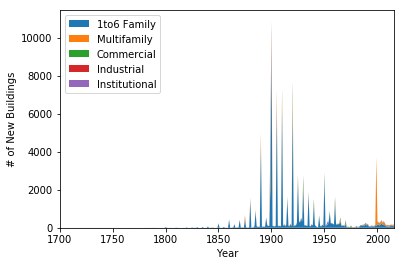

In [26]:
#Big variance for count within years. Maybe log scale for readability?
#Very few buildings before 1850, so xlim can be fiddled with
fig1 = plt.figure()
plt.stackplot(years,smallFam, multiFam,commercial,industrial,institutional, labels=['1to6 Family', 'Multifamily', 'Commercial', 'Industrial', 'Institutional'])
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("# of New Buildings")
plt.xlim(xmin=1700,xmax=2016)
plt.show()
fig1.savefig("Figures/AllDates.png")

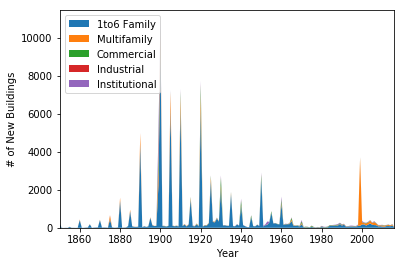

In [24]:
fig2 = plt.figure()
plt.stackplot(years,smallFam, multiFam,commercial,industrial,institutional, labels=['1to6 Family', 'Multifamily', 'Commercial', 'Industrial', 'Institutional'])
plt.legend(loc='upper left')
plt.xlabel("Year")
plt.ylabel("# of New Buildings")
plt.xlim(xmin=1850, xmax=2016)
plt.show()
fig2.savefig("Figures/Post1850.png")